In [3]:
import sys
import pandas as pd
from ema_workbench.analysis.parcoords import ParallelAxes, get_limits
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]
sys.path.append('..')

In [2]:
import rbf_functions

In [9]:
rbfs = [rbf_functions.squared_exponential_rbf,
        rbf_functions.gaussian_rbf,
        rbf_functions.inverse_quadric_rbf
       ]

pareto_sets = {}
for entry in rbfs:
    name = entry.__name__
    output_dir = f"../output/{name}/"
    
    results = pd.read_csv(output_dir + '10_solution.csv')
    results['environment'] = 1 - results['environment']
    
    pareto_sets[name] = results


In [30]:
df_se = pareto_sets['squared_exponential_rbf'].copy()
# print(df_se.max())
df_max = pd.DataFrame(columns=df_se.columns)
df_min = pd.DataFrame(columns=df_se.columns)
for i in df_se.idxmax():
    df_max = df_max.append(df_se.loc[i])
for i in df_se.idxmin():
    df_min= df_min.append(df_se.loc[i])

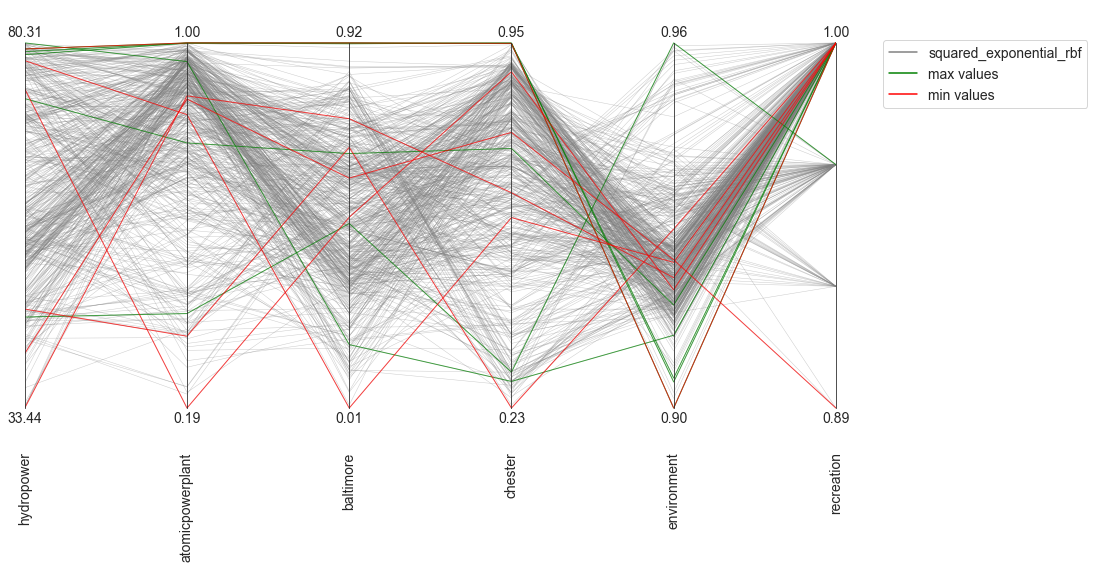

In [39]:
limits = get_limits(df_se)
axes = ParallelAxes(limits)    
axes.plot(df_se, label='squared_exponential_rbf', lw=0.5, color='grey', alpha=0.4)
axes.plot(df_max, label='max values', lw=1, color='green', alpha=.7)
axes.plot(df_min, label='min values', lw=1, color='red', alpha=0.7)
axes.legend()
plt.show()

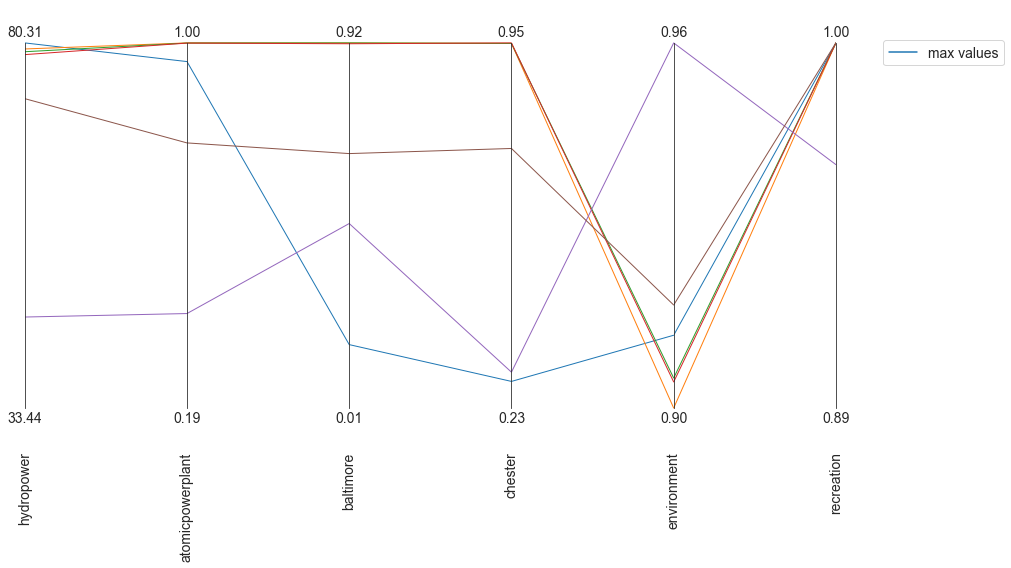

In [155]:
limits = get_limits(df_se)
axes = ParallelAxes(limits)    
axes.plot(df_max, label='max values', lw=1, color='green' alpha=1)
axes.legend()
plt.show()

In [12]:
import plotly.express as px

fig = px.parallel_coordinates(df_se)
fig.show()

<AxesSubplot:>

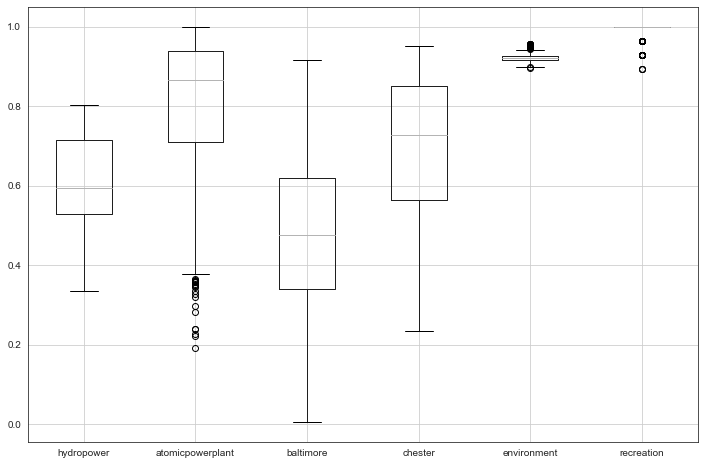

In [87]:
boxp = pareto_sets['squared_exponential_rbf'].copy()
boxp['hydropower'] = boxp['hydropower']/100
boxp.boxplot()

In [156]:
fig = px.scatter_matrix(df_se)
fig.update_traces(diagonal_visible=False)
fig.show()